# Spase Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sparse_coding import SparseCodingModel
from sparse_coding_utils import get_bar_images, get_mnist_images, get_natural_images, create_patchwork
import tensorflow as tf
from scipy.io import loadmat

## Bar Images

In [2]:
model = SparseCodingModel(256, 64, 0.001)
X_train = get_bar_images(2000, 16, 16)
model.train(X_train, num_steps=1000)

100% (100 of 100) |######################| Elapsed Time: 0:00:47 Time:  0:00:47


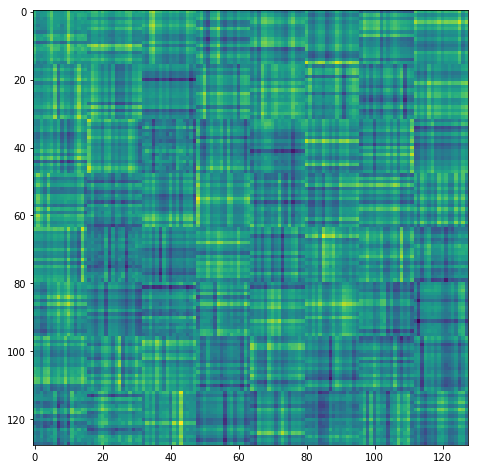

In [5]:
bar_features = create_patchwork(model.Phi, 8, 8, (16, 16))
plt.figure(figsize=(8, 8))
plt.imshow(bar_features)
plt.show()

In [21]:
X_test = get_bar_images(10, 16, 16)
activations = model.predict(X_test, num_steps=3000)
X_pred = model.generate(activations)

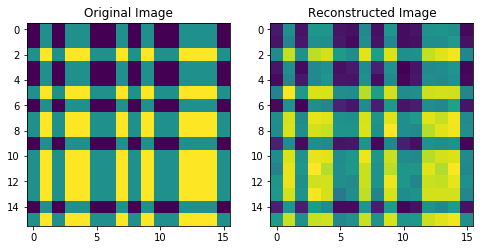

In [25]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(X_test[2].reshape(16, 16))
ax1.set_title("Original Image")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_pred[:, 2].reshape(16, 16))
ax2.set_title("Reconstructed Image")

plt.show()

## With Numbers

In [27]:
num_dataset = get_mnist_images(number=-1)
num_model = SparseCodingModel(200, 64, 0.005)
num_model.train(num_dataset, num_steps=100)

100% (10 of 10) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


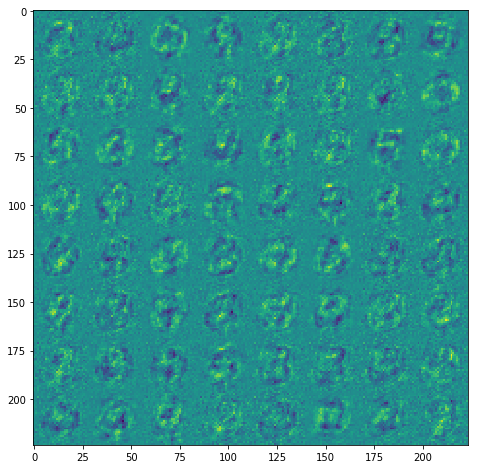

In [28]:
bar_features = create_patchwork(num_model.Phi, 8, 8, (28, 28))
plt.figure(figsize=(8, 8))
plt.imshow(bar_features)
plt.show()

In [31]:
X_test = num_dataset[:20]
activations = num_model.predict(X_test, num_steps=3000)
X_pred = num_model.generate(activations)

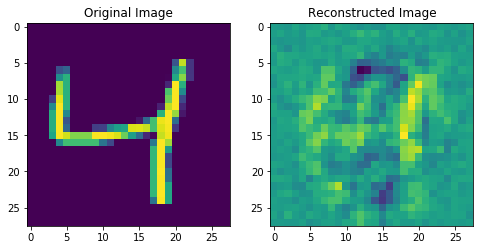

In [32]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(X_test[2].reshape(28, 28))
ax1.set_title("Original Image")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_pred[:, 2].reshape(28, 28))
ax2.set_title("Reconstructed Image")

plt.show()

## Natural images

In [16]:
if "IMAGES.mat" not in os.listdir():
    !wget https://github.com/hmallen99/vs265_files/raw/master/IMAGES.mat
img_mat = loadmat("IMAGES.mat")["IMAGES"]
X = get_natural_images(img_mat, 28)

In [18]:
nat_model = SparseCodingModel(100, 400, 0.01)
nat_model.train(X, num_steps=400)

100% (10 of 10) |########################| Elapsed Time: 0:00:17 Time:  0:00:17


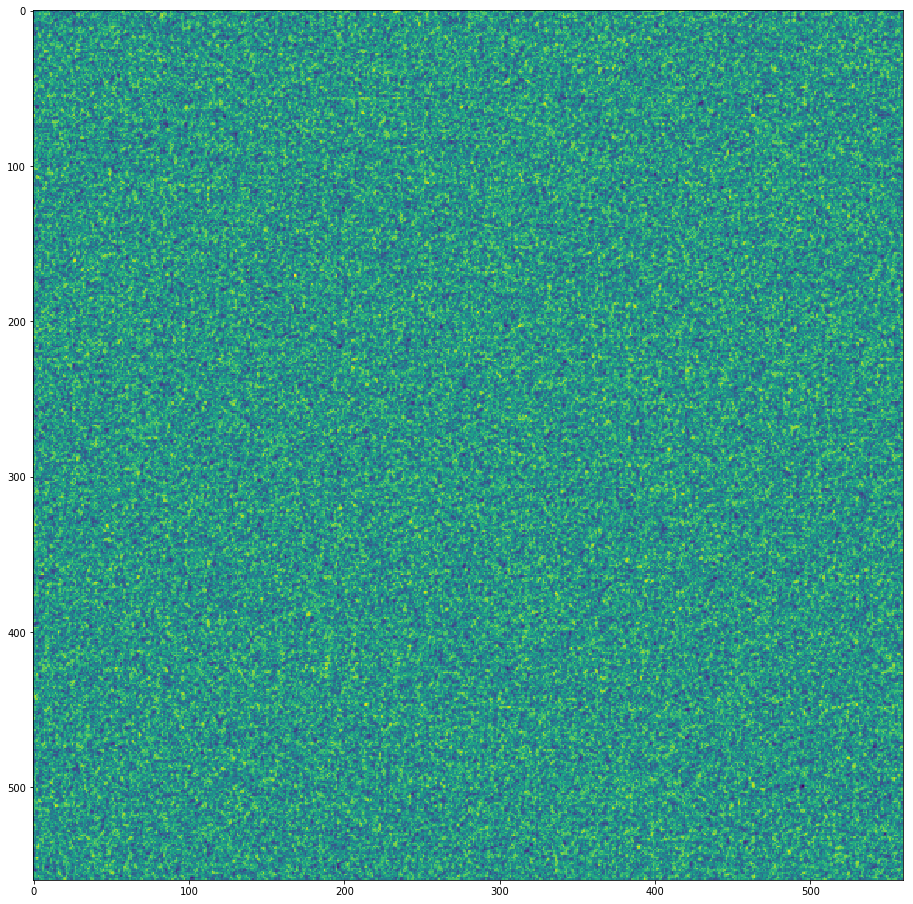

In [20]:
img = create_patchwork(nat_model.Phi, 20, 20, (28, 28))
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.savefig("natural_sparse_codes.png")

In [33]:
X_test = X[:20]
activations = nat_model.predict(X_test, num_steps=3000)
X_pred = nat_model.generate(activations)

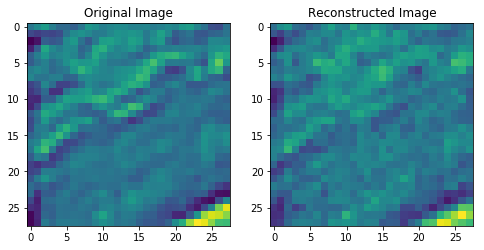

In [34]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(X_test[2].reshape(28, 28))
ax1.set_title("Original Image")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_pred[:, 2].reshape(28, 28))
ax2.set_title("Reconstructed Image")

plt.show()

### Dream Generation

In [50]:
from helmholtz import helmholtz
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.animation as animation

In [43]:
num2_images = get_mnist_images(number=2)[:200]
num2_activations = nat_model.predict(num2_images)

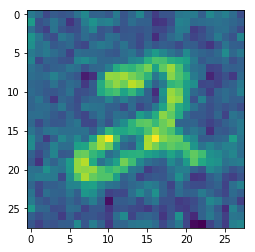

In [45]:
plt.imshow(nat_model.generate(num2_activations[:, 0]).reshape(28, 28))

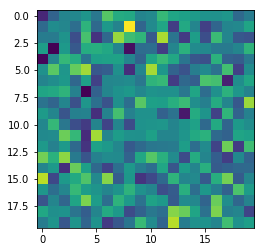

In [46]:
plt.imshow(activations[:, 0].reshape(20, 20))

In [47]:
nat_helmholtz = helmholtz([400, 512], 'beta', .05)

for i in tqdm(range(10)):
    nat_helmholtz.train(num2_activations[:, i].reshape(1, -1))

(400, 512)
(512, 1)

100%|██████████| 10/10 [00:58<00:00,  5.88s/it]



100%|██████████| 100/100 [00:00<00:00, 1052.14it/s]
Animation Creation Started
MovieWriter ffmpeg unavailable. Trying to use pillow instead.
Animation Creation Finished


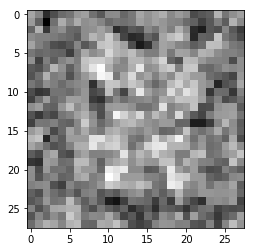

In [51]:
frames = [] 
fig = plt.figure()
for dream in tqdm(nat_helmholtz.dreams[::100]):
    dream = nat_model.generate(dream).reshape(28, 28)
    frames.append([plt.imshow(dream, cmap = 'gray', animated=True)])

print('Animation Creation Started')
ani = animation.ArtistAnimation(fig, frames, interval=10, blit=True)
ani.save('faces_dreaming_2.gif')
print('Animation Creation Finished')

plt.show()